# Задание 1

In [13]:
import pandas as pd
import numpy as np
from pathlib import Path

base_path = Path(r'C:\Users\user\Desktop')
hr_df = pd.read_csv(Path(base_path, 'HR.csv') if pathlib.Path.cwd().parent.name == 'Github' else 'HR.csv', na_filter=False)
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Задание 2

0. Статистика по столбцам с некатегориальными значениями

In [4]:
statistics_discrete = hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',]].describe()
statistics_discrete

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


1. Категориальные значения

In [9]:
statistics_described = hr_df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()
statistics_described

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


# Задание 3

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


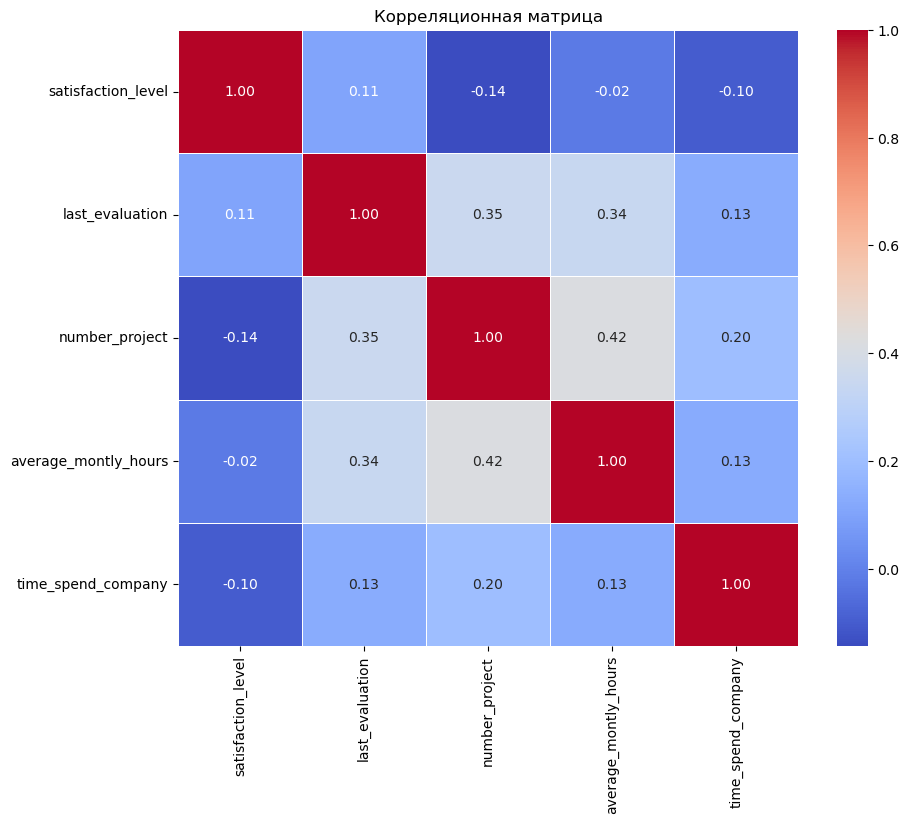

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()


In [28]:
# самые скоррелированные пары
most_correlated = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated_pairs = most_correlated[most_correlated < 1].head(2)

# наименее скоррелированные пары
least_correlated = correlation_matrix.unstack().sort_values(ascending=True)
least_correlated_pairs = least_correlated.head(2)

print("Самые скоррелированные пары:")
print(most_correlated_pairs)

print("\nНаименее скоррелированные пары:")
print(least_correlated_pairs)


Самые скоррелированные пары:
number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64

Наименее скоррелированные пары:
number_project      satisfaction_level   -0.14297
satisfaction_level  number_project       -0.14297
dtype: float64


# Задание 4

In [53]:
departments = set(hr_df['department'].unique())
workers_count = {}

for dep in departments:
    workers_count[dep] = hr_df.loc[hr_df['department'] == dep, 'department'].count()

print('Количество сотрудников в отделах:\n')
for department, number in workers_count.items():
    if number % 10 == 0 or number % 10 > 4:
        print(f'В отделе {department.upper()} работает {number} сотрудников')
    elif number % 10 == 1:
        print(f'В отделе {department.upper()} работает {number} сотрудник')
    else:
        print(f'В отделе {department.upper()} работает {number} сотрудникa')

Количество сотрудников в отделах:

В отделе MARKETING работает 858 сотрудников
В отделе PRODUCT_MNG работает 902 сотрудникa
В отделе TECHNICAL работает 2720 сотрудников
В отделе IT работает 1227 сотрудников
В отделе RANDD работает 787 сотрудников
В отделе MANAGEMENT работает 630 сотрудников
В отделе ACCOUNTING работает 767 сотрудников
В отделе HR работает 739 сотрудников
В отделе SALES работает 4140 сотрудников
В отделе SUPPORT работает 2229 сотрудников


# Задание 5

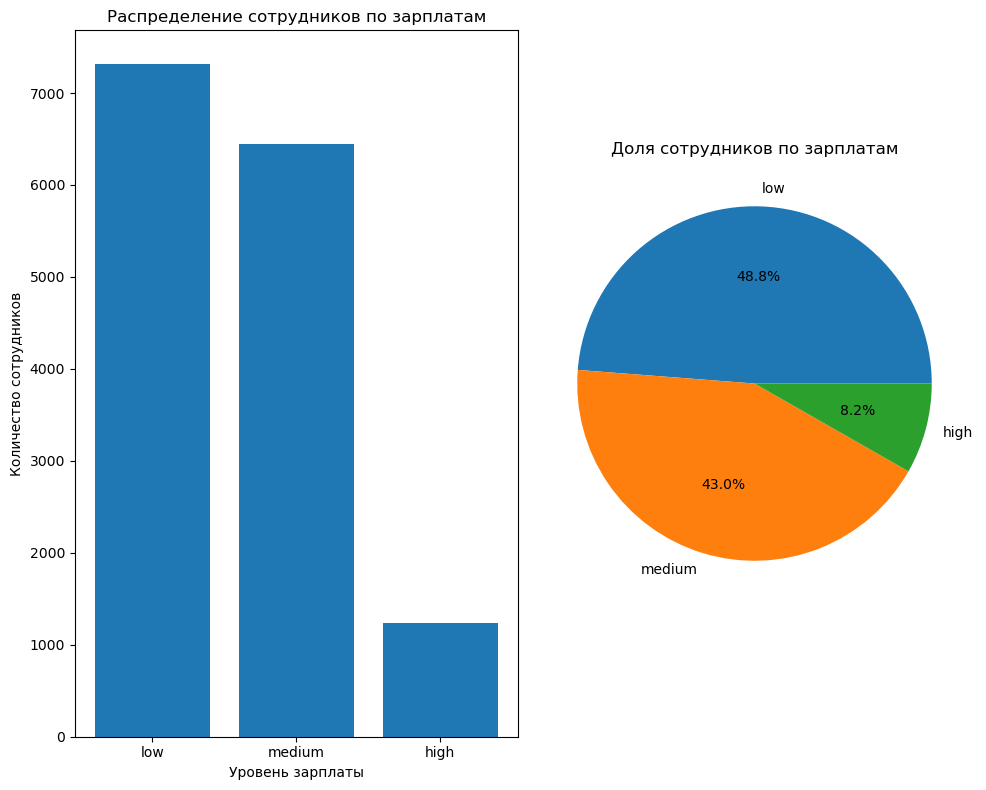

In [64]:
# Подсчитываем количество сотрудников для каждого уровня зарплаты
salary_counts = hr_df['salary'].value_counts()

new_order = ['low', 'medium', 'high']

# Пересортируем значения с помощью reindex
salary_counts_sorted = salary_counts.reindex(new_order, fill_value=0)
fig = plt.figure(figsize=(10, 8))
# Создаем столбчатую диаграмму
plt.subplot(1, 2, 1)
plt.bar(salary_counts_sorted.index, salary_counts_sorted.values)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')

# Создаем диаграмму "пирог"
plt.subplot(1, 2, 2)
plt.pie(salary_counts_sorted, labels=salary_counts_sorted.index, autopct='%1.1f%%')
plt.title('Доля сотрудников по зарплатам')

plt.tight_layout()

# Отображаем диаграммы
plt.show()


# Задание 6

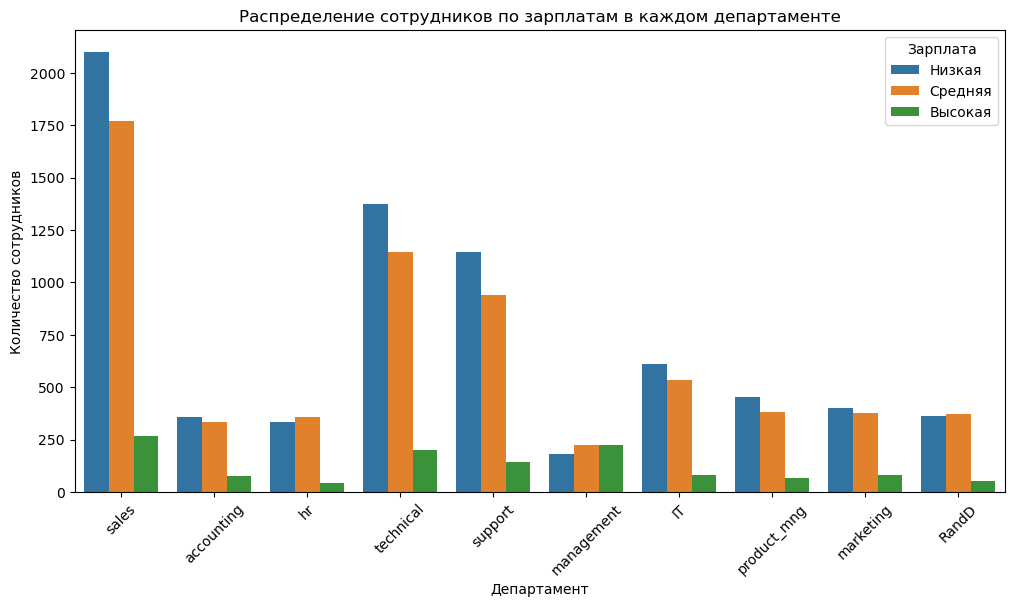

In [65]:
# Создаем столбчатую диаграмму для распределения сотрудников по зарплатам в каждом департаменте
plt.figure(figsize=(12, 6))  # Задаем размер графика

sns.countplot(data=hr_df, x='department', hue='salary', order=hr_df['department'].unique())
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.legend(title='Зарплата', loc='upper right', labels=['Низкая', 'Средняя', 'Высокая'])


plt.xticks(rotation=45)

plt.show()


# Задание 7

In [70]:
from scipy import stats

low_salary_group = hr_df.loc[hr_df['salary'] == 'low', 'average_montly_hours']
high_salary_group = hr_df.loc[hr_df['salary'] == 'high', 'average_montly_hours']

t_statistic, p_value = stats.ttest_ind(low_salary_group, high_salary_group, equal_var=False)

alpha = 0.05

if p_value < alpha:
    print("Существует статистически значимая разница во времени работы между сотрудниками с низким и высоким окладом.")
else:
    print("Нет статистически значимой разницы во времени работы между сотрудниками с низким и высоким окладом.")

Нет статистически значимой разницы во времени работы между сотрудниками с низким и высоким окладом.


# Задание 8

In [92]:
# Группируем данные по признаку "left" (уволился ли сотрудник)
grouped_data = hr_df.groupby('left')

# Рассчитываем долю сотрудников с повышением за последние 5 лет для каждой группы
promotion_rate = grouped_data['promotion_last_5years'].mean() * 100

# Рассчитываем средний уровень удовлетворенности для каждой группы
satisfaction_mean = grouped_data['satisfaction_level'].mean() * 100

# Рассчитываем медианное количество проектов для каждой группы
projects_mean = grouped_data['number_project'].mean()

# Выводим результаты
print("Доля сотрудников с повышением за последние 5 лет:")
print(promotion_rate)

print("\nСредний уровень удовлетворенности:")
print(satisfaction_mean)

print("\nСреднее количество проектов:")
print(projects_mean)


Доля сотрудников с повышением за последние 5 лет:
left
0    2.625131
1    0.532064
Name: promotion_last_5years, dtype: float64

Средний уровень удовлетворенности:
left
0    66.680959
1    44.009801
Name: satisfaction_level, dtype: float64

Среднее количество проектов:
left
0    3.786664
1    3.855503
Name: number_project, dtype: float64


# Задание 9

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


X = hr_df.drop(['department', 'salary', 'left'], axis=1)
y = hr_df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность модели LDA на тестовой выборке:", accuracy)

Точность модели LDA на тестовой выборке: 0.7557777777777778
